In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

plt.rcParams.update({'font.size': 16})
%matplotlib widget

In [2]:
def lookuptime(energy):
    fd = np.loadtxt("/Users/olgaridzel/Research/mast_sey/materials/sio2/TOF_Ezero_WF9.2_10105V.dat")
    ind = np.searchsorted(fd[:,0],energy)
    return fd[ind,1]

def lookupenergy(time):
    fd = np.loadtxt("/Users/olgaridzel/Research/mast_sey/materials/sio2/TOF_Ezero_WF9.2_10105V.dat")
    ind = np.searchsorted(np.sort(fd[:,1]),time)
    n = len(fd[:,1])
    return fd[n-ind-1,0]


## SiO2

In [ ]:
fd = np.loadtxt("materials/sio2/spa/mc_distrib.plot_1")

ind_se = fd[:,1] == 1
ind_pe = fd[:,1] == 0
plt.figure()

plt.hist(fd[ind_se,0],bins=500)
plt.hist(fd[ind_pe,0],bins=500)
plt.show()

In [ ]:
fd = np.loadtxt("materials/sio2/spa/mc_coin.plot_6")
x = np.random.normal(0, 1, 100)
y = np.random.normal(1, 1, 100)
H, xedges, yedges = np.histogram2d(fd[:,0],fd[:,1])
# eloss = np.linspace(0,69,70)
# time = lookup(fd[ind_se,1])



# plt.figure()
# plt.hist2d(fd[:,0],fd[:,1],bins=(200,200),norm=matplotlib.colors.LogNorm())
# plt.hist2d(100-eloss,time,bins=(100,100),norm=matplotlib.colors.LogNorm())
# plt.hist2d(100-fd[:,0],fd[:,1],bins=(200,200),norm=matplotlib.colors.LogNorm())
# plt.yscale('log')
# plt.xlim(0,100)
# plt.ylim(0,100)
# plt.plot([4.8,4.8],[0,100],color='black')
# plt.plot([100-4.8,100-4.8],[0,100],color='black')
# plt.annotate(r"E$_g$ = 4.8 eV", xy=(100-4.7, 90), xytext=(100-8.1, 105), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.annotate(r"E$_g$ = 4.8 eV", xy=(5.8, 70), xytext=(6.1, 80), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.plot([4.8+5.0,4.8+5.0],[0,100],color='black')
# plt.plot([100-13,100-13],[0,100],color='black')
# plt.annotate(r"U$_i$ = 13 eV", xy=(100-13.0, 40), xytext=(100-40.0, 60), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.annotate(r"E$_g + U_i$ = 10.2 eV", xy=(10.3, 40), xytext=(10.9, 60), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.plot(eloss,eloss-4.8)
# plt.plot(eloss,eloss-4.8-5.0)
# plt.plot(eloss,100-eloss-4.8,color='black')
# plt.plot(eloss,100-eloss-13,color='black')
# plt.ylim(500, 0)
# plt.ylabel('TOF (ns)')
# plt.xlabel(r'E$_{loss}$ (eV)')
# plt.title(r'SiO$_2$ (SPA imfp)')
# plt.colorbar(label="Coincidence counts")
# plt.set_cmap('jet')
# plt.show()

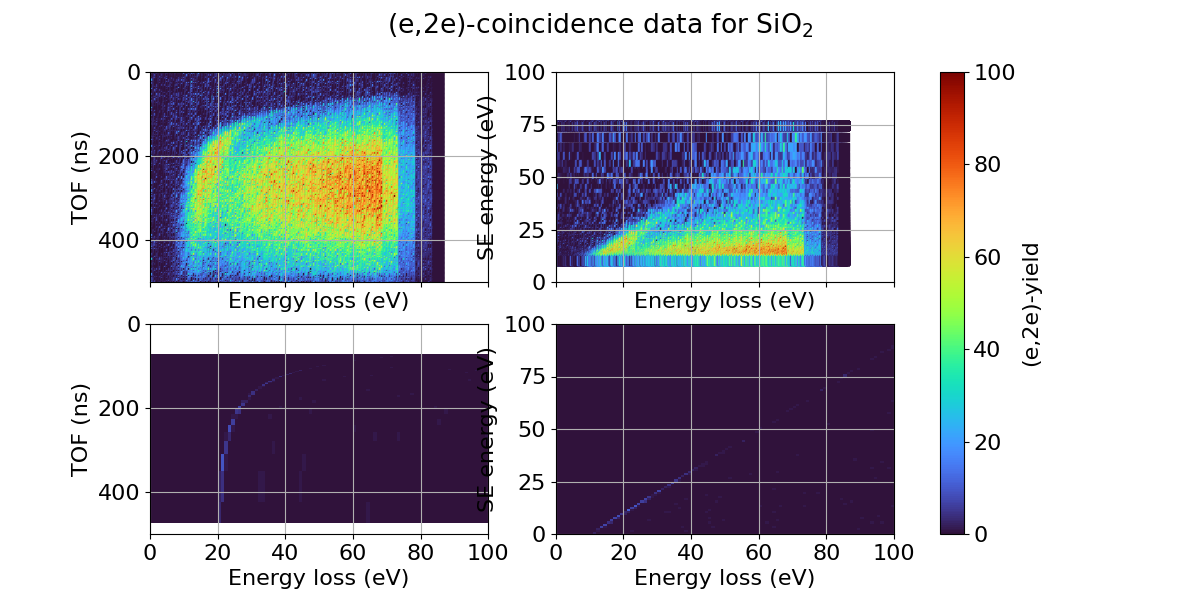

In [20]:
fd_mc = np.loadtxt("materials/sio2/spa/mc_coin.plot_5")
fd_exp = np.loadtxt("/Users/olgaridzel/Research/mast_sey/materials/sio2/t2d.dat")
# fd_exp = np.loadtxt("/Users/olgaridzel/Research/mast_sey/materials/sio2/t2d_sio2_e100p200.dat")

cmap=cm.get_cmap('turbo')
normalizer=colors.Normalize(0,100)
im=cm.ScalarMappable(norm=normalizer)

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True,figsize=(12, 6))
plt.suptitle(r'(e,2e)-coincidence data for SiO$_2$')

sc = axs[0, 0].scatter(fd_exp[:,0], fd_exp[:,1], c=fd_exp[:,4],marker='s',cmap=cmap,norm=normalizer)
axs[0, 0].set_xlabel('Energy loss (eV)')
axs[0, 0].set_ylabel('TOF (ns)')
axs[0, 0].set_xlim(0,100)
axs[0, 0].set_ylim(500,0)
axs[0, 0].grid(True)

ind = fd_exp[:,1] < 474
sc = axs[0,1].scatter(fd_exp[ind,0], lookupenergy(fd_exp[ind,1]), c=fd_exp[ind,4],marker='s',cmap=cmap,norm=normalizer)
axs[0,1].set_ylabel('SE energy (eV)')
axs[0,1].set_xlabel('Energy loss (eV)')
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0,100)
axs[0,1].grid(True)
# cbar = fig.colorbar(sc,ax=axs[0,:])
# cbar.set_label('(e,2e)-yield')

eloss = np.linspace(0,100,101)
H, xedges, yedges = np.histogram2d(100-fd_mc[:,0],fd_mc[:,1],bins=(eloss,eloss))
H = H.T
X, Y = np.meshgrid(xedges,yedges)
pcm = axs[1,1].pcolormesh(X, Y, H,cmap=cmap,norm=normalizer)
axs[1,1].set_ylim(0,100)
axs[1,1].set_xlim(0,100)
axs[1,1].set_xlabel('Energy loss (eV)')
axs[1,1].set_ylabel('SE energy (eV)')
axs[1,1].grid(True)

se = np.linspace(0,70,101)
H, xedges, yedges = np.histogram2d(100-fd_mc[:,0],fd_mc[:,1],bins=(eloss,se))
H = H.T
X, Y = np.meshgrid(xedges,lookuptime(yedges))
pcm = axs[1,0].pcolormesh(X, Y, H,cmap=cmap,norm=normalizer)
axs[1,0].set_ylabel('TOF (ns)')
axs[1,0].set_xlabel('Energy loss (eV)')
axs[1,0].grid(True)
axs[1,0].set_ylim(500,0)
axs[1,0].set_xlim(0,100)
# cbar = fig.colorbar(pcm, ax=axs[1,:])
# cbar.set_label('(e,2e)-yield')
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist())
cbar.set_label('(e,2e)-yield')
plt.show()

In [ ]:
fd = np.loadtxt("materials/sio2/spa/mc_coin.plot_9")
eloss = np.linspace(0,100,100)

plt.figure()
plt.hist2d(fd[:,0],fd[:,1],bins=(200,200),norm=matplotlib.colors.LogNorm())
# plt.hist2d(100-fd[:,0],fd[:,1],bins=(200,200),norm=matplotlib.colors.LogNorm())
# plt.yscale('log')
plt.xlim(0,100)
plt.ylim(0,100)
# plt.plot([4.8,4.8],[0,100],color='black')
plt.plot([100-4.8,100-4.8],[0,100],color='black')
plt.annotate(r"E$_g$ = 4.8 eV", xy=(100-4.7, 90), xytext=(100-8.1, 105), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.annotate(r"E$_g$ = 4.8 eV", xy=(5.8, 70), xytext=(6.1, 80), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.plot([4.8+5.0,4.8+5.0],[0,100],color='black')
plt.plot([100-13,100-13],[0,100],color='black')
plt.annotate(r"U$_i$ = 13 eV", xy=(100-13.0, 40), xytext=(100-40.0, 60), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.annotate(r"E$_g + U_i$ = 10.2 eV", xy=(10.3, 40), xytext=(10.9, 60), arrowprops=dict(arrowstyle="->",linestyle="-"))
# plt.plot(eloss,eloss-4.8)
# plt.plot(eloss,eloss-4.8-5.0)
plt.plot(eloss,100-eloss-4.8,color='black')
plt.plot(eloss,100-eloss-13,color='black')
plt.ylabel('SE energy (eV)')
plt.xlabel('PE energy loss (eV)')
plt.title(r'SiO$_2$ (SPA imfp)')
plt.colorbar(label="Coincidence counts")
plt.set_cmap('jet')
plt.show()

In [ ]:
plt.savefig("coin_sio2_new.png",dpi=600,bbox_inches='tight')

## PMMA

In [ ]:
fd_ale = np.loadtxt("materials/pmma/sey/cern.sey")
fd_low_cern = np.loadtxt("materials/pmma/sey/pmma_low_sey_cern.csv",delimiter=",")
fd_cern = np.loadtxt("materials/pmma/sey/pmma_sey_cern.csv",delimiter=",")

# fd_spa = np.loadtxt("materials/pmma/spa/out-ph/sey.plot")
# fd_mll = np.loadtxt("materials/pmma/mll/out-ph/sey.plot")

In [ ]:
plt.figure()

plt.scatter(fd_ale[:,0], fd_ale[:,1],label="Ale (CERN)",color="orange")
plt.scatter(fd_low_cern[:,0], fd_low_cern[:,1],label="Fabian (CERN)",color="gray")
plt.scatter(fd_cern[:,0], fd_cern[:,1],label="Fabian (CERN)",color="gray")

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PMMA")
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.figure()

plt.scatter(fd_ale[:,0], fd_ale[:,1],label="Ale (CERN)",color="orange")
plt.scatter(fd_low_cern[:,0], fd_low_cern[:,1],label="Fabian (CERN)",color="gray")
plt.scatter(fd_cern[:,0], fd_cern[:,1],label="Fabian (CERN)",color="gray")

plt.plot(fd_spa[:,0], fd_spa[:,1],label="mast_sey (SPA)",color='blue')
plt.plot(fd_mll[:,0], fd_mll[:,1],label="mast_sey (MLL)",color='red')

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PMMA")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
fd_mfp_spa = np.loadtxt("materials/pmma/spa/mfp.plot")
fd_mfp_mll = np.loadtxt("materials/pmma/mll/mfp.plot")
fd_imfp_tpp = np.loadtxt("../optical-data-fit/imfp/pmma/pmma_New_TPP-2M.imfp")

In [ ]:
plt.figure()

plt.scatter(fd_imfp_tpp[:,0], fd_imfp_tpp[:,1],label="TPP-2M",color="gray")

plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,1],label="imfp SPA",color="blue")
# plt.plot(fd_mfp_mll[:,0], fd_mfp_mll[:,1],label="imfp MLL",color="red")

# plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,2],label="emfp",color="green")

plt.plot([4.8, 4.8], [1, 1000], color="black")
plt.annotate(r"$U_i = 4.8$ eV", xy=(4.7, 500), xytext=(1.1, 700), arrowprops=dict(arrowstyle="->"))

plt.plot([6.7, 6.7], [1, 1000], "--", color="black")
plt.annotate(r"E$_g$ = 6.7 eV", xy=(6.8, 5), xytext=(7, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))


plt.xlabel(r"E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel(r"MFP ($\AA$)")
plt.title("PMMA")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1))
plt.show()

In [ ]:
fd_el = np.loadtxt("materials/pmma/spa/mc_sc_el.plot")
fd_in = np.loadtxt("materials/pmma/spa/mc_sc_in.plot")
fd_ph = np.loadtxt("materials/pmma/spa/mc_sc_ph.plot")
fd_pol = np.loadtxt("materials/pmma/spa/mc_sc_pol.plot")

In [ ]:
plt.figure()
plt.hist(fd_el,150,color='b',label="elastic",alpha=0.7)
plt.hist(fd_ph,150,color='g',label="phonon",alpha=0.7)
plt.hist(fd_in,150,color='r',label="inelastic",alpha=0.7)
plt.hist(fd_pol,150,color='orange',label="polaron",alpha=0.7)

plt.plot([4.8, 4.8], [-1, 100000], color="black")
plt.annotate(r"$\chi = U_i = 4.8$ eV", xy=(4.75, 55000), xytext=(15.0, 30000), arrowprops=dict(arrowstyle="->"))

plt.plot([6.7, 6.7], [-1, 100000], "--", color="black")
plt.annotate(r"E$_g$ = 6.7 eV", xy=(6.8, 5), xytext=(7, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))

plt.ylim(1,1e5)
plt.xlim(1,100)
plt.yscale('log')
plt.xlabel(r"Electron energy E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel("Number of scattering events")
plt.title(r"PMMA E$_0$ = 100 eV")
plt.legend()
plt.show()

In [ ]:
pmma_fd_low_cern = np.loadtxt("materials/pmma/sey/pmma_low_sey_cern.csv",delimiter=",")
pmma_fd_cern = np.loadtxt("materials/pmma/sey/pmma_sey_cern.csv",delimiter=",")

ps_fd_low_cern = np.loadtxt("materials/ps/sey/ps_low_sey_cern.csv",delimiter=",")
ps_fd_cern = np.loadtxt("materials/ps/sey/ps_sey_cern.csv",delimiter=",")

fd_sey = np.loadtxt("materials/ps/mll/out/sey.plot")

In [ ]:
plt.figure()

# plt.scatter(pmma_fd_low_cern[:,0], pmma_fd_low_cern[:,1],label="Fabian (CERN)",color="blue")
# plt.scatter(pmma_fd_cern[:,0], pmma_fd_cern[:,1],label="Fabian (CERN)",color="blue")
plt.scatter(ps_fd_low_cern[:,0], ps_fd_low_cern[:,1],label="CERN",color="gray")
plt.scatter(ps_fd_cern[:,0], ps_fd_cern[:,1],label="CERN",color="gray")

plt.plot(fd_sey[:,0],fd_sey[:,1],label="total")
plt.plot(fd_sey[:,0],fd_sey[:,2],label="true se")

plt.xlabel("Landing energy (eV)")
plt.ylabel("TEY")
plt.title("PS")
# plt.xlim(0,30)
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
fd = np.loadtxt("materials/pmma/spa/mc_distrib.plot_1")

In [ ]:
ind_se = fd[:,1] == 1
ind_pe = fd[:,1] == 0
plt.figure()

plt.hist(fd[ind_se,0],bins=500)
plt.hist(fd[ind_pe,0],bins=500)
plt.show()

In [ ]:
fd = np.loadtxt("materials/pmma/spa/mc_coin.plot_1")
eloss = np.linspace(0,100,100)

plt.figure()
plt.hist2d(100-fd[:,0],fd[:,1],bins=(200,200),norm=matplotlib.colors.LogNorm())
plt.yscale('log')
plt.xlim(0,50)
plt.ylim(0,50)
plt.plot([6.7,6.7],[0,100],color='black')
# plt.annotate(r"E$_g$ = 5.7 eV", xy=(5.8, 70), xytext=(6.1, 80), arrowprops=dict(arrowstyle="->",linestyle="-"))
plt.plot([6.7+4.8,6.7+4.8],[0,100],color='black')
# plt.annotate(r"E$_g + U_i$ = 10.2 eV", xy=(10.3, 40), xytext=(10.9, 60), arrowprops=dict(arrowstyle="->",linestyle="-"))
plt.plot(eloss,eloss-6.7)
plt.plot(eloss,eloss-4.8-6.7)
plt.ylabel('SE energy (eV)')
plt.xlabel('PE energy loss (eV)')
plt.title('PMMA (SPA imfp)')
plt.colorbar(label="Coincidence counts")
plt.set_cmap('jet')
plt.show()

### PS

In [ ]:
fd = np.loadtxt("/Users/olgaridzel/Research/mast_sey/materials/ps/plot-data (2).csv", delimiter=',')
ene = (fd[-1,0] - fd[:,0])*27.21138602
dos = fd[:,1]
enn = np.linspace(30,1000)
sq = np.sqrt(enn)
nergy = np.concatenate((ene[::-1],enn))
doss = np.concatenate((dos[::-1],sq*3.5))

plt.figure()
plt.plot(ene[::-1], dos[::-1])
plt.plot(nergy,doss)
plt.show()



In [ ]:
fd = open('/Users/olgaridzel/Research/mast_sey/materials/ps/spa/dos.in', 'w')

for i in range(len(nergy)):
    fd.write(f'{nergy[i]:.8f} {doss[i]:.8f}\n')
    
fd.close()

In [ ]:
fd = np.loadtxt('/Users/olgaridzel/Research/mast_sey/materials/ps/spa/dos.in')

plt.figure()
plt.plot(fd[:,0],fd[:,1])
plt.show()

In [ ]:
fd_mfp_spa = np.loadtxt("materials/ps/spa/mfp.plot")
fd_mfp_mll = np.loadtxt("materials/ps/mll/mfp.plot")
fd_imfp_tpp = np.loadtxt("../optical-data-fit/imfp/ps/ps_New_TPP-2M.imfp")

In [ ]:
plt.figure()

plt.scatter(fd_imfp_tpp[:,0], fd_imfp_tpp[:,1],label="TPP-2M",color="gray")

plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,1],label="imfp SPA",color="blue")
plt.plot(fd_mfp_mll[:,0], fd_mfp_mll[:,1],label="imfp MLL",color="red")

# plt.plot(fd_mfp_spa[:,0], fd_mfp_spa[:,2],label="emfp",color="green")

plt.plot([4.5, 4.5], [1, 1000], color="black")
plt.annotate(r"$U_i = 4.5$ eV", xy=(4.4, 500), xytext=(1.1, 700), arrowprops=dict(arrowstyle="->"))

plt.plot([5.7, 5.7], [1, 1000], "--", color="black")
plt.annotate(r"E$_g$ = 5.7 eV", xy=(5.8, 5), xytext=(6, 1.4), arrowprops=dict(arrowstyle="->",linestyle="--"))


plt.xlabel(r"E - E$_g$ - E$_{vb}$ (eV)")
plt.ylabel(r"MFP ($\AA$)")
plt.title("PS")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1))
plt.show()

In [ ]:
fd = np.loadtxt("materials/ps/spa/mc_distrib.plot_1")
ind_se = fd[:,1] == 1
ind_pe = fd[:,1] == 0
plt.figure()

plt.hist(fd[ind_se,0],bins=500,label='Secondaries',alpha=0.8)
plt.hist(fd[ind_pe,0],bins=500,label='Primaries')

fd = np.loadtxt("materials/ps/spa/mc_distrib.plot_2")
ind_se = fd[:,1] == 1
ind_pe = fd[:,1] == 0
plt.hist(fd[ind_se,0],bins=500,label='Secondaries',alpha=0.8)
plt.hist(fd[ind_pe,0],bins=500,label='Primaries')
# plt.yscale('log')
plt.xlabel('Electron energy (eV)')
plt.ylabel('Counts')
plt.title(r'PS $E_0 = 100$ eV')
# plt.xlim(0,20)
# plt.ylim(0, 13000)
plt.legend()
plt.show()

In [ ]:
fd = np.loadtxt("/Users/olgaridzel/Research/olga-optical-data/raw_data/ps/ps_reels_e1600p20_17V_10scans.hst")

In [ ]:
plt.figure()
plt.plot(fd[:,0],fd[:,1])
plt.show()

In [ ]:
fd = np.loadtxt("materials/ps/spa/mc_coin.plot_5")
eloss = np.linspace(0,100,100)

plt.figure()
plt.hist2d(100-fd[:,0],fd[:,1],bins=(200,200),norm=matplotlib.colors.LogNorm())
plt.yscale('log')
# plt.xlim(0,50)
# plt.ylim(0,50)
plt.plot([5.7,5.7],[0,100],color='black')
# plt.annotate(r"E$_g$ = 5.7 eV", xy=(5.8, 70), xytext=(6.1, 80), arrowprops=dict(arrowstyle="->",linestyle="-"))
plt.plot([5.7+4.5,5.7+4.5],[0,100],color='black')
# plt.annotate(r"E$_g + U_i$ = 10.2 eV", xy=(10.3, 40), xytext=(10.9, 60), arrowprops=dict(arrowstyle="->",linestyle="-"))
plt.plot(eloss,eloss-5.7)
plt.plot(eloss,eloss-4.5-5.7)
plt.ylabel('SE energy (eV)')
plt.xlabel('PE energy loss (eV)')
plt.title('PS (SPA imfp)')
plt.colorbar(label="Coincidence counts")
plt.set_cmap('jet')
plt.show()

## Al

In [ ]:
fd_imfp_dft = np.loadtxt("materials/al/dft/mfp.plot")
fd_imfp_spa = np.loadtxt("materials/al/spa/mfp.plot")
fd_imfp_tpp = np.loadtxt("/Users/olgaridzel/Research/PHYSDAT/dbi/diel/imfp/tpp/al.iimfp")

plt.figure()

plt.scatter(fd_imfp_tpp[:,0], fd_imfp_tpp[:,1],label="TPP-2M",color="gray")

plt.plot(fd_imfp_spa[:,0], fd_imfp_spa[:,1],label="imfp SPA",color="blue")
plt.plot(fd_imfp_dft[:,0], fd_imfp_dft[:,1],label="imfp DFT",color="red")

plt.plot([4.04, 4.04], [1, 1000], color="black")
plt.annotate(r"$\phi = 4.04$ eV", xy=(4.0, 500), xytext=(1.1, 700), arrowprops=dict(arrowstyle="->"))


plt.xlabel("E (eV)")
plt.ylabel(r"MFP ($\AA$)")
plt.title("Al")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1))
plt.show()